In [3]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt

In [6]:
train_data_csv = pd.read_csv("/Users\jacks\Desktop\Mine\MNIST_project\mnist_train_data.csv")
test_data_csv = pd.read_csv("/Users\jacks\Desktop\Mine\MNIST_project\mnist_test_data.csv")

# Previewing data if wanted
# test_data_csv.head()
# test_data_csv.head()

In [7]:
# Turning data into numpy arrays
train_data = np.array(train_data_csv)
test_data = np.array(test_data_csv)

# For Row/Col indexing for later
num_examples_train, features_train = train_data.shape
num_examples_test, features_test = test_data.shape

# Shuffle train data to prevent overfitting
np.random.shuffle(train_data)
np.random.shuffle(test_data)

# Transpose and extract features + labels and divide by 255 to get values between 0 and 1
train_data_T = train_data.T
test_data_T = test_data.T

Y_train = train_data_T[0]
X_train = train_data_T[1:features_train]
X_train = X_train / 255.

Y_test = test_data_T[0]
X_test = test_data_T[1:features_test]
X_test = X_test / 255.

In [9]:
######### Sub functions ########
def param_updater(X, dX, lr):
    return X - lr*dX

def ReLU(Z):
    return np.maximum(0,Z)

def softmax(Z):
    exp = np.exp(Z - np.max(Z)) 
    return exp / exp.sum(axis=0)

def one_hot(Y):
    # Creating a matrix where the only value that is one is the predicted value
    # e.g.
    # [0,0,0,0,1,0,0,0,0,0] => would mean 4 is the correct answer
    # This does this for all our why values and stores them in matrix one_hot_Y
    one_hot_Y = np.zeros((Y.size, Y.max() + 1))
    one_hot_Y[np.arange(Y.size), Y] = 1
    one_hot_Y = one_hot_Y.T
    return one_hot_Y

def deriv_ReLU(Z):
    # When booleans are converted to numbers true is 1 and false is zero
    return Z > 0
#############################

####### Main Functions ############
def init_params():
    W1 = np.random.rand(10,784) - 0.5
    W2 = np.random.rand(10,10) - 0.5
    b1 = np.random.rand(10,1) - 0.5
    b2 = np.random.rand(10,1) - 0.5
    return W1, W2, b1, b2

def forward_prop(W1, W2, b1, b2, X):
    # Network 1
    Z1 = W1.dot(X) + b1
    # Non-linear 1
    A1 = ReLU(Z1)
    # Newtork 2
    Z2 = W2.dot(A1) + b2
    # Answer
    A2 = softmax(Z2)
    return Z1, Z2, A1, A2

def back_prop(Z1, Z2, A1, A2, W2, X, Y):
    size_Y = Y.size
    one_hot_Y = one_hot(Y)
    
    dZ2 = 2*(A2 - one_hot_Y)
    dW2 = 1 / size_Y * dZ2.dot(A1.T)
    db2 = 1 / size_Y * np.sum(dZ2,1)
    db2_T = np.array([db2]).T
    
    dZ1 = W2.T.dot(dZ2) * deriv_ReLU(Z1)
    dW1 = 1 / size_Y * dZ1.dot(X.T)
    db1 = 1 / size_Y * np.sum(dZ1,1)
    db1_T = np.array([db1]).T
    
    return dW1, dW2, db1_T, db2_T
    
def update_params(W1, W2, b1, b2, dW1, dW2, db1, db2, lr):
    W1 = param_updater(W1,dW1,lr)
    W2 = param_updater(W2,dW2,lr)
    b1 = param_updater(b1,db1,lr)
    b2 = param_updater(b2,db2,lr)
    return W1, W2, b1, b2
    

In [10]:
###### Prediction Accuracy Functions ###############
def get_pred(A2):
    # A2 is the prediction from forward prop (Softmax function)
    # Argmax finds the largest value
    # We can instead use A2 to see % levels of predictions if we want
    return np.argmax(A2,0)

def get_accuracy(pred, Y):
    # Total that are correct / size of sample
    return np.sum(pred == Y) / Y.size

def make_pred(X, W1, W2, b1, b2):
    # Making a prediction set
    _, _, _, A2 = forward_prop(W1, W2, b1, b2, X)
    pred = get_pred(A2)
    return pred

def accuracy(X, Y, W1, W2, b1, b2):
    # Accuracy of prediction set
    pred = make_pred(X, W1, W2, b1, b2)
    return get_accuracy(pred, Y)
#######################################################

#### Gradient Descent
def gradient_descent(X, Y, iterations, lr, update_every = 50, updates = False):
    W1, W2, b1, b2 = init_params()
    
    for i in range(iterations+1):
        Z1, Z2, A1, A2 = forward_prop(W1, W2, b1, b2, X)
        dW1, dW2, db1, db2 = back_prop(Z1, Z2, A1, A2, W2, X, Y)
        W1, W2, b1, b2 = update_params(W1, W2, b1, b2, dW1, dW2, db1, db2, lr)
        
        #Printing updates
        if updates == True: 
            if i % update_every == 0:
                print("Iteration: " + str(i))
                print("Accuracy: ", get_accuracy(get_pred(A2), Y))
                print("---------------------------------------")
            
    return W1, W2, b1, b2   

In [11]:
updates = True
update_every = 50

lr = 0.1
iterations = 500

# We are storing W1, W2, b1, b2 as this *is* the neural network we have created
# We can pass these values through forawrd_prop at anytime to see our prediction on a trained network
W1, W2, b1, b2 = gradient_descent(X_train, Y_train, iterations, lr, update_every, updates)


Iteration: 0
Accuracy:  0.06801666666666667
---------------------------------------
Iteration: 50
Accuracy:  0.5405166666666666
---------------------------------------
Iteration: 100
Accuracy:  0.69495
---------------------------------------
Iteration: 150
Accuracy:  0.77175
---------------------------------------
Iteration: 200
Accuracy:  0.8026833333333333
---------------------------------------
Iteration: 250
Accuracy:  0.8336166666666667
---------------------------------------
Iteration: 300
Accuracy:  0.8483166666666667
---------------------------------------
Iteration: 350
Accuracy:  0.8580833333333333
---------------------------------------
Iteration: 400
Accuracy:  0.8657
---------------------------------------
Iteration: 450
Accuracy:  0.8710333333333333
---------------------------------------
Iteration: 500
Accuracy:  0.8752
---------------------------------------


In [12]:
# We want these values to be very similiar to see that our model hasn't over-fitted 
# and is in fact generalised

train_accuracy = accuracy(X_train, Y_train, W1, W2, b1, b2)
test_accuracy = accuracy(X_test, Y_test, W1, W2, b1, b2)

print("Test Accuracy: " + str(test_accuracy))
print("Train Accuracy: " + str(train_accuracy))

Test Accuracy: 0.88
Train Accuracy: 0.8740333333333333


In [14]:
import pygame
from pygame.locals import( QUIT, MOUSEBUTTONUP, MOUSEBUTTONDOWN, MOUSEMOTION)

pygame 2.5.2 (SDL 2.28.3, Python 3.11.4)
Hello from the pygame community. https://www.pygame.org/contribute.html


In [16]:
def convert_to_28_by_28(screen_array_copy):
    #This is quite inefficient but it is small data so I don't really care :/
    #Very hacky maths as this was not the goal of today
    first_minimisation = np.empty([560,28])
    the_28_by_28 = np.empty([28,28])

    for j in range(0,560):
        current_row_index = j
        for k in range(0,560,20):
            current_row = screen_array_copy[int(current_row_index)]
            
            min_row = j
            min_col = int(k/20)
                
            first_minimisation[min_row,min_col] = np.sum(current_row[k:(k+20)])
            
    for j in range(0,28):
        current_col_index = j
        for k in range(0,560,20):
            current_col = first_minimisation[:,int(current_col_index)]
            
            min_col = j
            min_row = int(k/20)
            
            the_28_by_28[min_row,min_col] = (((np.sum(current_col[k:(k+20)])) / 16777215) / 400) * 255
                
    return the_28_by_28
    
# Displaying a test image and predicted value
def get_pred_and_confidence(A2):
    # A2 is the prediction from forward prop (Softmax function)
    # Argmax finds the largest value
    # We can instead use A2 to see % levels of predictions if we want
    return np.argmax(A2,0), A2[np.argmax(A2,0)]

def make_pred_with_confidence(X, W1, W2, b1, b2):
    # Making a prediction set
    _, _, _, A2 = forward_prop(W1, W2, b1, b2, X)
    pred, confidence = get_pred_and_confidence(A2)
    return pred, confidence

def test_pred(image, W1, W2, b1, b2):
    current_image = image
    pred, confidence = make_pred_with_confidence(current_image, W1, W2, b1, b2)
    return pred, confidence
    
def pred_drawing(screen):
    # Create a copy, so it doesn't shut on us
    screen_array = np.array(pygame.surfarray.array2d(screen)).T
    screen_array_copy = screen_array
    
    the_28_by_28 = convert_to_28_by_28(screen_array_copy)
    the_28_by_28_flat = np.array([the_28_by_28.flatten()]).T
    
    pred_from_drawing, confidence = test_pred(the_28_by_28_flat, W1, W2, b1, b2)
    
    return pred_from_drawing[0], confidence, the_28_by_28_flat
    
def printing_results(screen):
    guess, confidence, scaled_down_image = pred_drawing(screen)
    
    scaled_down_image = scaled_down_image.reshape((28, 28)) * 255
    plt.gray()
    plt.imshow(scaled_down_image, interpolation='nearest')
    plt.show()
    
    print("Guess: " + str(guess))
    print("Confidence: " + str(confidence[0][0]*100) + "%")
    print("\n *note that this guess is based on the rescaled image you see above*")

    return 
    
#### Drawing board #########
def try_drawing_a_number():    
    pygame.init()

    screen = pygame.display.set_mode((560,560))
    screen.fill((0,0,0))

    running = True
    drawing = False

    while running:
        for event in pygame.event.get():
            if event.type == QUIT:
                running = False
                printing_results(screen)
                pygame.display.quit()
                pygame.quit()
            if event.type == MOUSEBUTTONDOWN:
                drawing = True
            if event.type == MOUSEBUTTONUP:
                drawing = False
            if event.type == MOUSEMOTION:
                if drawing:
                    mouse_position = pygame.mouse.get_pos()
                    pygame.draw.circle(screen, (255, 255, 255), mouse_position, 25)      
        if running == True:             
            pygame.display.flip()

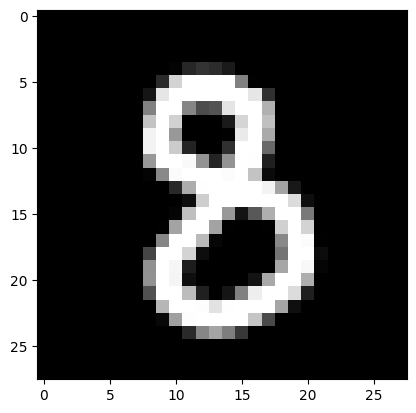

Guess: 8
Confidence: 100.0%

 *note that this guess is based on the rescaled image you see above*


In [17]:
### Run this cell to check is out!!

# Make sure to quit out to see your result
try_drawing_a_number()